In [1]:
from google.colab.patches import cv2_imshow

In [2]:
import imutils

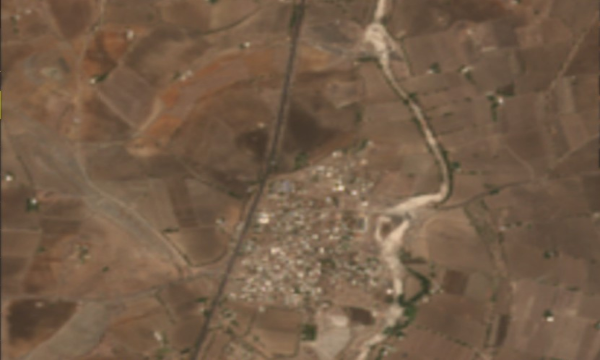

In [3]:
import cv2
#import imutils
import numpy as np

img1 = cv2.imread("image1.jpeg")
img1 = cv2.resize(img1,(600,360))

img2 = cv2.imread("image2.jpeg")
img2 = cv2.resize(img2,(600,360))

#Grayscale
#gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
#gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#diff = cv2.absdiff(gray1,gray2)
#cv2.imshow("diff(img1,img2)",diff)



cv2_imshow(img1)

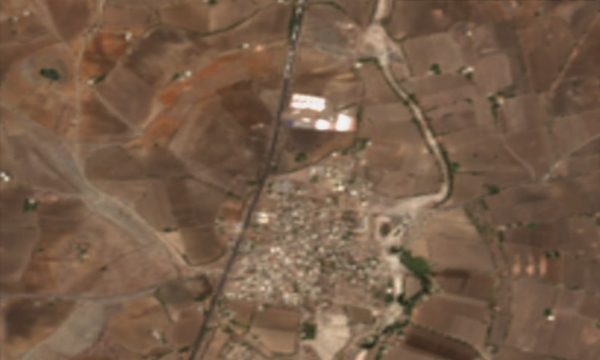

In [4]:
cv2_imshow(img2)

In [5]:
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

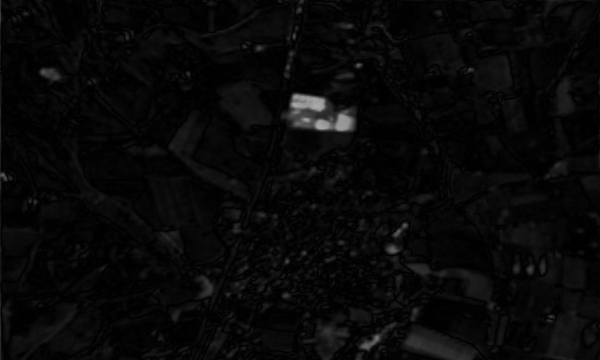

In [6]:
diff = cv2.absdiff(gray1,gray2)
cv2_imshow(diff)

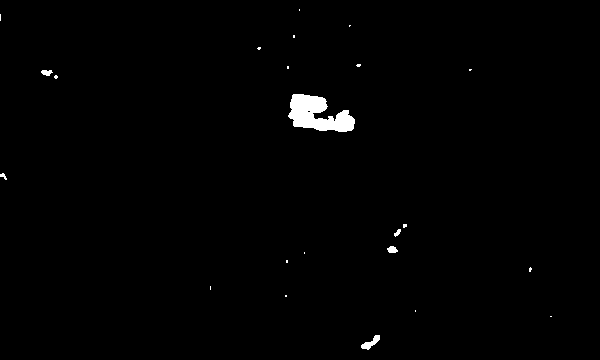

In [7]:
thresh = cv2.threshold(diff,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

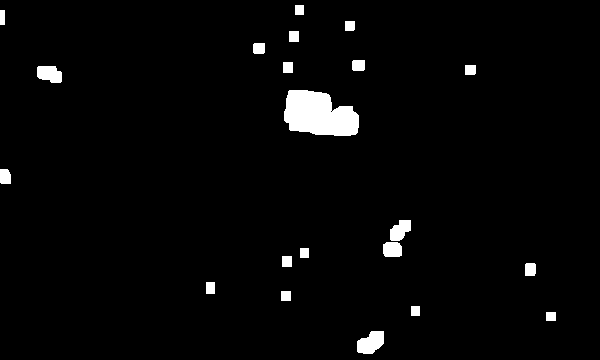

In [8]:
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(thresh,kernel,iterations = 2)
cv2_imshow(dilate)


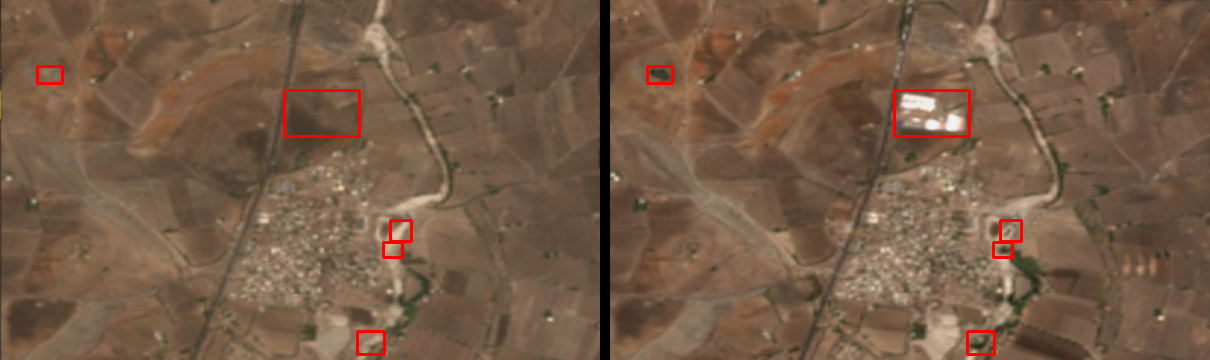

In [9]:
contours = cv2.findContours(dilate.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

#Loop over each contours
for contour in contours:
  if cv2.contourArea(contour) > 200:
    #Calculate bounding box
    x,y,w,h = cv2.boundingRect(contour)

    cv2.rectangle(img1,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,0,255),2)

#show final image with difference
x = np.zeros((360,10,3),np.uint8)
result = np.hstack((img1,x,img2))

cv2_imshow(result)
